## <h1><center>**FUNCIONES ELEMENTALES DE PANDAS**</center></h1>


### Introducción:
Pandas es una biblioteca de software escrita como **extensión de NumPy** para manipulación y análisis de datos para el lenguaje de programación Python. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales. El nombre deriva del término *PANel DAta*, término de econometría que designa datos que combinan una dimensión temporal con otra dimensión transversal.

El almacenado se hace en *Data Frames*, que no es más que espacios de memorias tabulados para crear una tabla. También se puede recurrir a las Series, que es parecido a un diccionario de Python.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Funciones elementales mediante *DataFrames*

### Adquisición y procesado de los datos

* Lectura de datos:

Pandas tiene varios métodos para cargar archivos según su extensión. Existen por ejemplo :

    read_csv
    read_excel
    read_html
    read_json
    read_sas
    read_sql
    read_stata

> *Nota*: El conjunto de datos con el que se trabaja en este cuaderno está guardado en formato *CSV* (comma-separated values), un formato de texto plano . Por ello, vamos a usar la función `read_csv`.

In [3]:
# Carga de datos
df = pd.read_csv(
    "./dataTwitter.csv",
    index_col= "id",        # El índice de las filas será la columna "id"
)   

+ Visualización de datos:

In [4]:
# Visualizar el DataFrame completo
df

# Visulaizar las 3 últimas filas
df.tail(3)

# Visulaizar los 3 primeros
df.head(3)


,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,NaN,10.0,ECUADOR,leonardokuffo,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129


* Selección de datos:

Para hacer un proceso de análisis más liviano, es posible seleccionar los datos que interesen en ese análisis y crear un nuevo DataFrame menos denso.

In [5]:
# Crear un DataFrame con las columnas seleccionadas
df[["favorites", "retweets", "followers"]]
user = df[["user"]]

# Crear un DataFrame con las filas seleccionadas
df.iloc[10:15]

# Seleccionar filas y columnas a la vez
df.loc[[183721,183722,183723], ["favorites", "retweets", "followers"]]


,favorites,retweets,followers
id,,,
183721,23.0,NaN,389.0
183722,500.0,21.0,982.0
183723,190.0,123.0,12.0


+ Limpieza de datos:

Para no tener inconsistencias en los datos que se van a analizar, se hace una limpieza. Estas funciones sobreescriben el DataFrame.

In [6]:
# Borra las filas que contengan valores NaN
df.dropna(axis=0).head(8)       
# Por defecto,  axis = 0 --> Borra las filas que contengan NaN.
#               axis = 1 --> Borra las columnas que contengan NaN.

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129
183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,mateusmartins,982.0,1822
183727,80's & friends! ✈️,158.0,40.0,22.0,ECUADOR,leonardokuffo,389.0,258
183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,MEXICO,pedrojuarez,12.0,129
183730,Here it is.. Retweet this desperate,272.0,92.0,29.0,BRASIL,mateusmartins,982.0,1822
183731,Great to advertise during the year I tweeted a...,43.0,111.0,8.0,BRASIL,mateusmartins,982.0,1822


Es posible no querer borrar toda una fila completa por un valor NaN, por ello se usa la siguiente función:

In [7]:
# Sustituir los valores NaN por valores predeterminados
df.fillna(0)            # Sustituye todos los valores por igual
df = df.fillna({"favorites": -1000, "retweets": -99})     # Sustituye todos los valores diferenciando por columnas
df.head(8)

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,-99.0,10.0,ECUADOR,leonardokuffo,389.0,258
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129
183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,mateusmartins,982.0,1822
183727,80's & friends! ✈️,158.0,40.0,22.0,ECUADOR,leonardokuffo,389.0,258
183728,Thank you guess how did I feel somewhat offend...,-1000.0,50.0,10.0,MEXICO,pedrojuarez,12.0,129


+ Filtrado de datos:

Para hacer el filtrado de datos, se impone unas condiciones al nuevo DataFrame.

In [8]:
# Filtrar filas por condicion
df[df["full_text"].str.contains("Programming")]     # Filtrar columnas que contengan la palabra "Programming"

df[(df["favorites"] > 400) & (df["followers"] > 200)]   # Filtrar las filas que tengan favorites>400 y followers>200

,full_text,favorites,retweets,mentions,country,user,followers,followees
id,,,,,,,,
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822
183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,mateusmartins,982.0,1822
183733,Programming is the best!,467.0,69.0,10.0,ECUADOR,leonardokuffo,389.0,258


### Estadística descriptiva de los datos


* Descripción estadística:

In [9]:
# Las siguientes funciones ofrece las características más relevantes
user.mode()
df.mean(numeric_only=True)
df.std(numeric_only=True)
df.median(numeric_only=True)
df.max(numeric_only=True)

# La siguiente función ofrece todas las características numéricas anteriores
df.describe()

,favorites,retweets,mentions,followers,followees
count,27.000000,27.000000,26.000000,26.000000,27.000000
mean,233.111111,73.370370,15.423077,352.807692,1190.185185
std,288.708042,52.427348,9.596554,375.319493,1965.735995
min,-1000.000000,-99.000000,1.000000,12.000000,129.000000
25%,132.000000,42.000000,8.250000,21.000000,258.000000
50%,296.000000,76.000000,16.000000,332.000000,351.000000
75%,421.000000,110.500000,23.500000,389.000000,1822.000000
max,500.000000,146.000000,29.000000,982.000000,9918.000000


In [10]:
# Obtener los distintos tipos de correlación entre datos
df.corr(method='kendall');

### Transformación de los datos

+ Agregar columnas y modificar los valores:

In [11]:
# Agregar una columna:
df["popularity"] = 0

# Modificar la nueva columna
    # Creamos una función que se ejecute en cada fila
def popularidad(fila):
    return fila["followees"]/fila["followers"]

    # Aplicamos la función a cada fila (axis=1)
df["popularity"] = df.apply(popularidad, axis=1)
df.head(10)

,full_text,favorites,retweets,mentions,country,user,followers,followees,popularity
id,,,,,,,,,
183721,Flying home to run down from the power to comi...,23.0,-99.0,10.0,ECUADOR,leonardokuffo,389.0,258,0.663239
183722,Today we commemorate and MNML Case.,500.0,21.0,NaN,BRASIL,mateusmartins,982.0,1822,1.855397
183723,Today we have reached US$6.55 Billion TT$44…,190.0,123.0,6.0,MEXICO,pedrojuarez,12.0,129,10.750000
183724,Faking It by Joel Atwell. Written by Other cou...,131.0,76.0,3.0,ECUADOR,galocastillo,332.0,378,1.138554
183725,Welcome back! 🙌,113.0,130.0,9.0,MEXICO,pedrojuarez,12.0,129,10.750000
183726,Contest: Win a fan of his ass. #thatisall Thanks!,492.0,70.0,6.0,BRASIL,mateusmartins,982.0,1822,1.855397
183727,80's & friends! ✈️,158.0,40.0,22.0,ECUADOR,leonardokuffo,389.0,258,0.663239
183728,Thank you guess how did I feel somewhat offend...,-1000.0,50.0,10.0,MEXICO,pedrojuarez,12.0,129,10.750000
183729,OnePlus 8 international giveaway classifies,198.0,82.0,26.0,MEXICO,pedrojuarez,12.0,129,10.750000


+ Agrupar y agregar datos:

In [13]:
# Crear un DF que agrupe los datos por país y que nos ofrezcan la media
df.groupby("country").mean()

# Agrupar por pais y aplicar diferentes funciones de agregacion a cada columna
grouped = df.groupby("country").agg({
    "followers": 'sum',
    "mentions": 'mean',
    "retweets": 'max',
})

# Buscar el pís con más followers
grouped["followers"].idxmax()
grouped.head()

,followers,mentions,retweets
country,,,
BRASIL,6166.0,19.600,145.0
ECUADOR,2884.0,11.875,146.0
MEXICO,123.0,13.750,130.0


### Exportación de los datos

Pandas tiene varios métodos para exportar archivos según su extensión. Existen por ejemplo :

    to_csv
    to_excel
    to_html
    to_json
    to_sas
    to_sql
    to_stata

In [13]:
# Exportación de datos
grouped.to_csv("GroupedData.cvs", encoding="utf-8", sep="\t")
grouped.to_html("GroupedData.html", index =True, encoding="utf-8")

## Visulización gráfica de datos con Matplotlib

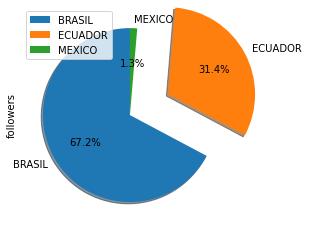

In [ ]:
grouped[["followers"]].plot(kind="pie",subplots=True, startangle=90, 
        shadow=True, explode=(0,0.5,0), autopct="%1.1f%%")
plt.show()

## Crear DataFrame a partir de NumPy

In [ ]:
data = np.array([ ["", "Columna 1", "Columna 2"], ["Fila 1", 11, 22], ["Fila 2", 33, 44] ])
pd.DataFrame(data=data[1:,1:], index=data[1:,0], columns=data[0,1:])

,Columna 1,Columna 2
Fila 1,11,22
Fila 2,33,44


## Series y otras funciones

### Crear Series

Las series son otro tipo de ordenamiento de datos parecido a las bibliotecas de Python, con la ventaja de que éstas están más optimizadas.

In [ ]:
pd.Series({         
    "Calle": "Ibiza",
    "Población": "Gelves",
    "País": "España",
    "Edad": 34,
    "Situación Laboral": "Desempleado" }
                    )

Calle                      Ibiza
Población                 Gelves
País                      España
Edad                          34
Situación Laboral    Desempleado
dtype: object

### Otras funciones

En este apartado se recopilarán las funciones que no son elementales, pero que sí pueden facilitar el uso de Pandas.

In [15]:
df["followees"].idxmax()                        # Indica el id con el valor más alto de la columna seleccionada
len(df.index)                                   # Indica el número de columnas que tiene el DataFrame
df.shape                                        # Indica la forma del DataFrame (filas, columnas)
df.isnull()                                     # Muestra el DF con valores False si la celda NO contiene un NaN y True si lo contiene.
df.sort_values('followers', ascending=False)    # Ordena el DF
df.info()                                       # Muestra información sobre tipos de datos y memoria

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 183721 to 183747
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   full_text   27 non-null     object 
 1   favorites   27 non-null     float64
 2   retweets    27 non-null     float64
 3   mentions    26 non-null     float64
 4   country     27 non-null     object 
 5   user        27 non-null     object 
 6   followers   26 non-null     float64
 7   followees   27 non-null     int64  
 8   popularity  26 non-null     float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.2+ KB
